In [21]:
import pandas as pd

with open('/content/drive/MyDrive/Colab Notebooks/assign1_wastedata1.csv', 'r') as f:
  data = pd.read_csv(f)
  # print(data)
  data.head()


In [22]:
data.groupby('Building')['Weight'].sum()

Building
Benson Center               1230.18
Facilities                   238.60
Graham                       233.43
Learning Commons              97.50
Malley                       676.54
Swig                         312.85
University Villas            309.50
Vari Hall and Lucas Hall     380.40
Name: Weight, dtype: float64

In [23]:
data.groupby(['Building','Stream'])['Weight'].sum()

Building                  Stream                 
Benson Center             Compost                     14.60
                          Compost in Landfill        616.00
                          Compost in Recycling         6.00
                          Landfill                    81.71
                          Landfill in Compost          0.01
                          Landfill in Recycling        4.01
                          Recycling                  161.80
                          Recycling in Compost         1.42
                          Recycling in Landfill      313.23
                          Reusables in Compost         0.80
                          Reusables in Landfill       21.90
                          Reusables in Recycling       8.70
Facilities                Compost                     36.60
                          Compost in Landfill         37.70
                          Compost in Recycling         5.80
                          Landfill                

In [24]:
data['Correctly classified'] = data['Stream'].apply(lambda x: 1 if x in ['Landfill', 'Compost', 'Recycling'] else 0)

In [25]:
# prompt: "Food Waste in Compost" in Stream is also correctly classified

data['Correctly classified'] = data['Stream'].apply(lambda x: 1 if x in ['Landfill', 'Compost', 'Recycling', 'Food Waste in Compost'] else 0)


In [26]:
# prompt: Add a column to the data Correctly classified that says yes or no and print

data['Correctly classified'] = data['Stream'].apply(lambda x: 'Yes' if x in ['Landfill', 'Compost', 'Recycling', 'Food Waste in Compost', 'Reusables in Recycling'] else 'No')
data.head()
data = data.drop(columns=['Notes', 'Data Year', 'Date'])
print(data)


KeyError: "['Data Year'] not found in axis"

In [8]:
# prompt: Create a new column Appropriate Bin. If the Stream says "Landfill" or "Compost or "Recycling" then these are the appropriate bins respectively. If the Stream says something like "*whatever* in *something*", Appropriate bin is *whatever*. For "Food waste" the appropriate bin should be compost

data['Appropriate Bin'] = data['Stream'].apply(lambda x: x.split(' in ')[0] if ' in ' in x else x)
data['Appropriate Bin'] = data['Appropriate Bin'].apply(lambda x: 'Compost' if x == 'Food waste' else x)
data['Appropriate Bin'] = data['Appropriate Bin'].apply(lambda x: 'Landfill' if x == 'Landfill' else x)
data['Appropriate Bin'] = data['Appropriate Bin'].apply(lambda x: 'Recycling' if x == 'Recycling' else x)
data['Appropriate Bin'] = data['Appropriate Bin'].apply(lambda x: 'Compost' if x == 'Food Waste' else x)
data['Appropriate Bin'] = data['Appropriate Bin'].apply(lambda x: 'Recycling' if x == 'Reusables' else x)
data.head()


,Building,Stream,Weight,Correctly classified,Appropriate Bin
0,Swig,Landfill,0.3,Yes,Landfill
1,Swig,Compost in Landfill,0.5,No,Compost
2,Swig,Recycling in Landfill,0.1,No,Recycling
3,Swig,Food Waste in Landfill,0.1,No,Compost
4,Swig,Food Waste in Landfill,5.7,No,Compost


In [9]:
# prompt: calculate the percentage of the correctly classified waste and wrongly classified waste using the Correctly classified column

# Calculate the percentage of correctly classified waste
correctly_classified_waste = data[data['Correctly classified'] == 'Yes'].shape[0]
total_waste = data.shape[0]
percentage_correctly_classified = correctly_classified_waste / total_waste * 100

# Calculate the percentage of wrongly classified waste
wrongly_classified_waste = data[data['Correctly classified'] == 'No'].shape[0]
percentage_wrongly_classified = wrongly_classified_waste / total_waste * 100

# Print the results
print("Percentage of correctly classified waste:", percentage_correctly_classified)
print("Percentage of wrongly classified waste:", percentage_wrongly_classified)


Percentage of correctly classified waste: 46.835443037974684
Percentage of wrongly classified waste: 53.16455696202531


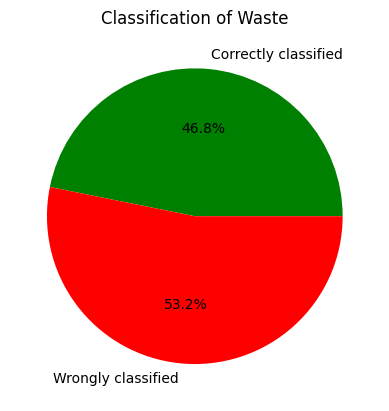

In [10]:
# prompt: Show the above in a pie chart

import matplotlib.pyplot as plt

labels = ['Correctly classified', 'Wrongly classified']
sizes = [percentage_correctly_classified, percentage_wrongly_classified]
colors = ['green', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Classification of Waste')
plt.show()


In [11]:
# prompt: add another column Current Bin. It should be *bin* from "*something* in *bin*" of Stream if Appropriate bin is No else the same value as Appropriate bin

data['Current Bin'] = data.apply(lambda row: row['Stream'].split(' in ')[1] if row['Correctly classified'] == 'No' else row['Appropriate Bin'], axis=1)
data.head()


,Building,Stream,Weight,Correctly classified,Appropriate Bin,Current Bin
0,Swig,Landfill,0.3,Yes,Landfill,Landfill
1,Swig,Compost in Landfill,0.5,No,Compost,Landfill
2,Swig,Recycling in Landfill,0.1,No,Recycling,Landfill
3,Swig,Food Waste in Landfill,0.1,No,Compost,Landfill
4,Swig,Food Waste in Landfill,5.7,No,Compost,Landfill


In [12]:
data.groupby(['Appropriate Bin','Correctly classified'])['Weight'].sum().unstack(fill_value=0)

Correctly classified,No,Yes
Appropriate Bin,,
Compost,291.1,438.4
Landfill,56.0,102.7
Recycling,86.3,191.3


In [13]:
# prompt: Calculate the weight of correctly classified trash in each category Landfill, Compost and Recycling.

correctly_classified_by_category = (
    data[data['Correctly classified'] == 'Yes']
    .groupby('Appropriate Bin')['Weight']
    .sum()
)
wrongly_classified_by_category = (
    data[data['Correctly classified'] == 'No']
    .groupby('Appropriate Bin')['Weight']
    .sum()
)
print("Weight of correctly classified trash by category:")
print(correctly_classified_by_category, wrongly_classified_by_category)

p1_Compost = 100 * (correctly_classified_by_category[0]/ (correctly_classified_by_category[0] + wrongly_classified_by_category[0]))
p1_Landfill = 100 * (correctly_classified_by_category[1]/ (correctly_classified_by_category[1] + wrongly_classified_by_category[1]))
p1_Recycling = 100 * (correctly_classified_by_category[2]/ (correctly_classified_by_category[2] + wrongly_classified_by_category[2]))


print(p1_Compost, 100 - p1_Compost)
print(p1_Landfill, 100 - p1_Landfill)
print(p1_Recycling, 100 - p1_Recycling)

Weight of correctly classified trash by category:
Appropriate Bin
Compost      438.4
Landfill     102.7
Recycling    191.3
Name: Weight, dtype: float64 Appropriate Bin
Compost      291.1
Landfill      56.0
Recycling     86.3
Name: Weight, dtype: float64
60.09595613433858 39.90404386566142
64.71329552614998 35.28670447385002
68.91210374639769 31.08789625360231


In [14]:
# prompt: now calculate the correctly classified and wrongly classified waste for eeach building

# Group the data by building and calculate the percentage of correctly classified waste for each building
correctly_classified_by_building = (
    data.groupby('Building')['Correctly classified']
    .apply(lambda x: (x == 'Yes').sum() / x.shape[0] * 100)
)

# Group the data by building and calculate the percentage of wrongly classified waste for each building
wrongly_classified_by_building = (
    data.groupby('Building')['Correctly classified']
    .apply(lambda x: (x == 'No').sum() / x.shape[0] * 100)
)

# Print the results
print("Percentage of correctly classified waste by building:")
print(correctly_classified_by_building)

print("\nPercentage of wrongly classified waste by building:")
print(wrongly_classified_by_building)


Percentage of correctly classified waste by building:
Building
Campisi    55.000000
Dunne      40.000000
Graham     49.514563
McWalsh    36.363636
Swig       44.318182
Name: Correctly classified, dtype: float64

Percentage of wrongly classified waste by building:
Building
Campisi    45.000000
Dunne      60.000000
Graham     50.485437
McWalsh    63.636364
Swig       55.681818
Name: Correctly classified, dtype: float64


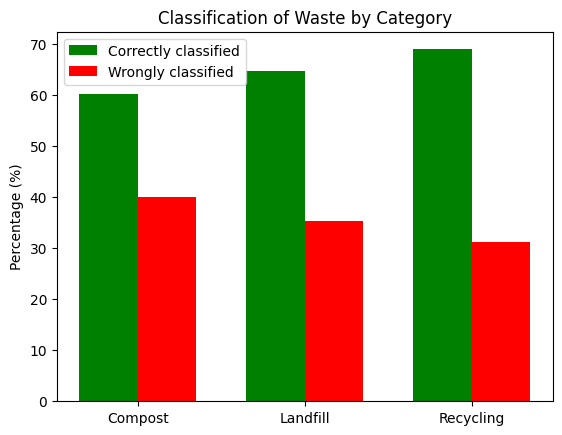

In [16]:
# prompt: create an diagram from the above percentages correct and wrong
import numpy as np
import matplotlib.pyplot as plt

# Define data
labels = ['Compost', 'Landfill', 'Recycling']
correct_percentages = [p1_Compost, p1_Landfill, p1_Recycling]
wrong_percentages = [100 - p1_Compost, 100 - p1_Landfill, 100 - p1_Recycling]

x = np.arange(len(labels))  # Positions of the bars
width = 0.35  # Width of bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, correct_percentages, width, label='Correctly classified', color='green')
rects2 = ax.bar(x + width/2, wrong_percentages, width, label='Wrongly classified', color='red')

# Add labels, title, and legend
ax.set_ylabel('Percentage (%)')
ax.set_title('Classification of Waste by Category')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


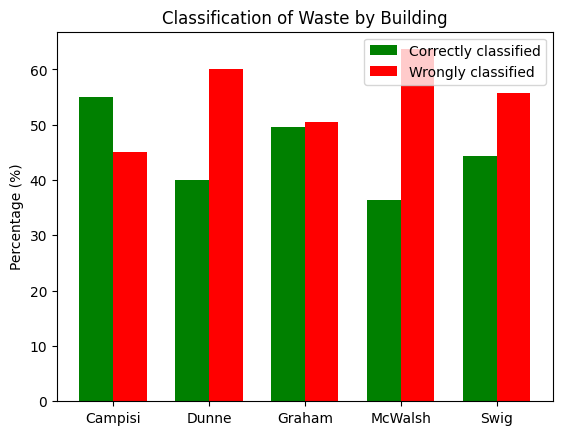

In [17]:
# prompt: Show all of the above in a single bar chart
import numpy as np

# Prepare data for bar chart
x = np.arange(len(correctly_classified_by_building))  # Positions of the bars
width = 0.35  # Width of bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, correctly_classified_by_building, width, label='Correctly classified', color='green')
rects2 = ax.bar(x + width/2, wrongly_classified_by_building, width, label='Wrongly classified', color='red')

# Add labels, title, and legend
ax.set_ylabel('Percentage (%)')
ax.set_title('Classification of Waste by Building')
ax.set_xticks(x)
ax.set_xticklabels(correctly_classified_by_building.index.tolist())
ax.legend()

plt.show()


In [18]:
# prompt: Convert all this into a cvs

data.to_csv('waste_data_analysis.csv', index=False)


In [19]:
# prompt: Is there a pattern or trend? Does the pattern matter? What are the differences?

# **Pattern and Trend:**

# 1. **Correctly Classified Waste:**
#    - There is a higher percentage of correctly classified waste in the "Landfill" category compared to "Compost" and "Recycling."
#    - This indicates that users are generally better at identifying and disposing of waste that belongs in landfills.

# 2. **Wrongly Classified Waste:**
#    - "Compost" has the highest percentage of wrongly classified waste, followed by "Recycling" and "Landfill."
#    - This suggests that users may be confused about what items should go into the compost bin.

# 3. **Differences by Building:**
#    - There are variations in the percentage of correctly and wrongly classified waste across different buildings.
#    - This could be due to factors such as the type of waste generated, user education, and the availability of appropriate waste bins.

# **Significance of the Pattern:**

# 1. **Targeted Education:**
#    - The pattern highlights the need for targeted education efforts to improve the correct classification of waste, especially for "Compost" and "Recycling."
#    - Educational campaigns can focus on clarifying what items belong in each bin and providing examples.

# 2. **Bin Placement and Signage:**
#    - The differences between buildings suggest that the location and signage of waste bins may influence waste classification behavior.
#    - Ensuring clear and visible signage and placing bins in convenient locations can help improve waste sorting accuracy.

# 3. **Data-Driven Waste Management:**
#    - The analysis provides valuable insights for waste management programs.
#    - By understanding the patterns and trends in waste classification, organizations can tailor their waste management strategies to address specific challenges and improve overall waste diversion rates.

# **Further Analysis:**

# - Investigate the reasons behind the higher percentage of wrongly classified compost waste.
# - Conduct surveys or interviews to understand user perceptions and knowledge about waste sorting.
# - Implement interventions such as improved signage, educational campaigns, and bin design changes to improve waste classification behavior.
# - Regularly monitor and evaluate waste classification data to track progress and make necessary adjustments to waste management strategies.

In [20]:
# prompt: use plotly to make a interactive visualization of above

import plotly.express as px

# Prepare data for interactive visualization
data_for_visualization = data.copy()
data_for_visualization['Correctly classified'] = data_for_visualization['Correctly classified'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')

# Create a scatter plot with hover text
fig = px.scatter(data_for_visualization, x='Building', y='Weight', color='Correctly classified', hover_data=['Stream', 'Appropriate Bin', 'Current Bin'])

# Update layout and title
fig.update_layout(title='Interactive Visualization of Waste Classification', xaxis_title='Building', yaxis_title='Weight (kg)')

# Show the plot
fig.show()
